***KFOLD HOTA YE HAI K HUM DATA KO SPLIT KARLETE HAI THEN OSKA EK HISSA TESTING K LIYE HOTA HAI OR BAQI HISSE TRAINIGN K LIYE LIKE IF K FOLD 4 HAI TU 3 PAR TRAIN HOGA OR 1 PAR TEST PHR DOBARA CHALEGA 2ND FOLD K LYE OR 1 3 4 TRAIN PE 2 TEST K LIYE LIKE THIS***

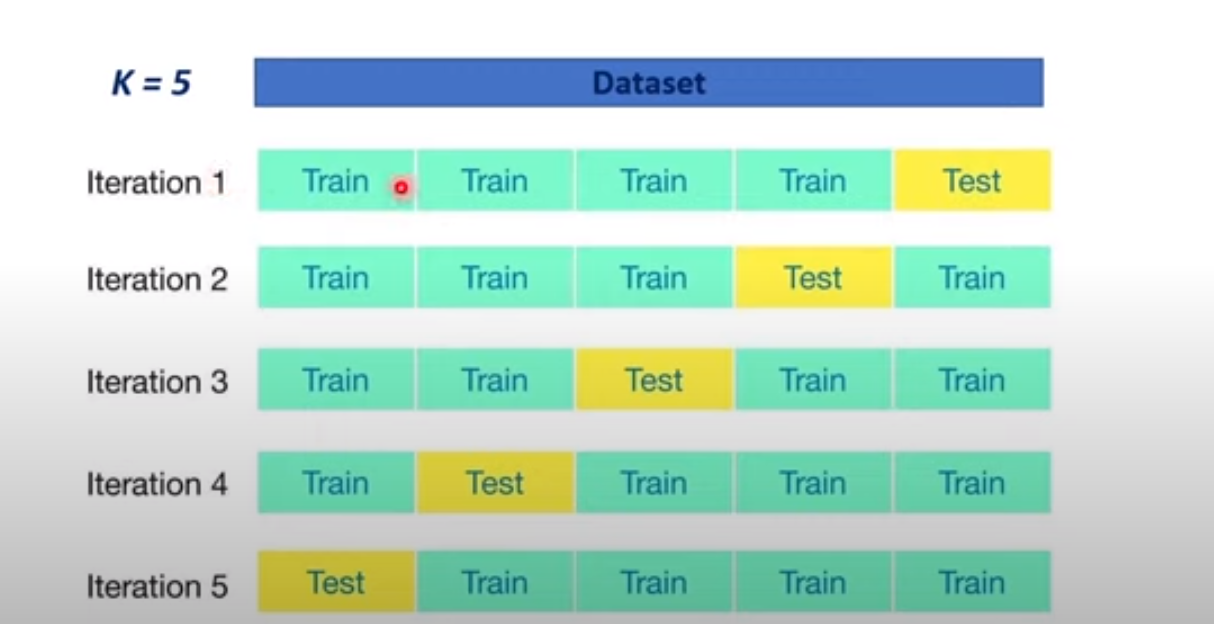

***ADVANTAGE OF K FOLDS***

    1) You can check the accuracy of a model in multiple chunks of data
    
    2) after each iteration we create a new instance of a model (MEANS WE INITIALIZE MODEL AGAIN) to test the accuracy score
    
    3) Better alternative for train_test_split when you dataset is small
    
    4) not advisable when data is large becuase of its nature it takes to much time 
    
    5) Better for multiclass Classification Problems

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
test_data = df.sample(n=51, random_state=42)

In [5]:
test_data_pre = test_data.drop("target",axis = 1)
test_data_tar = test_data[["target"]]

In [6]:
df.drop(test_data.index,inplace = True)

In [7]:
df.shape

(252, 14)

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

1 ------ Defective Heart

2 ------- Healthy Heart

# SPLITTING THE FEATURES AND TARGETS

In [9]:
df["target"].value_counts()

target
1    136
0    116
Name: count, dtype: int64

In [10]:
X = df.drop("target",axis = 1)
y = df["target"]

# TRAIN TEST SPLIT

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y ,random_state=3)

In [12]:
models = [LogisticRegression(max_iter=1000),SVC(kernel="linear"),KNeighborsClassifier(),RandomForestClassifier()]

In [13]:
def compare_models_train_Tesy():
    for model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        print("Accuracy",model,"=",accuracy)

In [14]:
compare_models_train_Tesy()

Accuracy LogisticRegression(max_iter=1000) = 0.8431372549019608
Accuracy SVC(kernel='linear') = 0.8627450980392157
Accuracy KNeighborsClassifier() = 0.6274509803921569
Accuracy RandomForestClassifier() = 0.8431372549019608


# CROSS VALIDATION FUNCTION

***We are using CrossValScore because the issue with Kfold we dont know the optimal value of K***

 cross-validation is a technique used to assess how well a model generalizes to unseen data

cross_val_score is indeed a convenient function to perform cross-validation without explicitly writing the loop for KFold. However, note that cross_val_score uses a default value of cv=5 (5-fold cross-validation) unless specified otherwise.

Logistic Regression

we are using full dataset as crossval split data on its own

In [15]:
cv_Score_lr = cross_val_score(LogisticRegression(max_iter=1000),X,y,cv = 5)
mean_acc = sum(cv_Score_lr)/len(cv_Score_lr)
mean_acc = mean_acc*100
mean_acc = round(mean_acc,2)

In [16]:
mean_acc

82.13

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [18]:
y_pred = model.predict(test_data_pre)

In [19]:
len(y_test)

51

In [20]:
accuracy = accuracy_score(test_data_tar,y_pred)

In [21]:
accuracy

0.8431372549019608

SUPPORT VECTOR CLASSIFIER

In [22]:
cv_Score_sv = cross_val_score(SVC(kernel="linear"),X,y,cv = 5)
mean_acc = sum(cv_Score_sv )/len(cv_Score_sv )
mean_acc = mean_acc*100
mean_acc = round(mean_acc,2)

In [23]:
mean_acc

80.94

In [24]:
model = SVC(kernel="linear")
model.fit(X, y)

SVC(kernel='linear')

In [25]:
y_pred = model.predict(test_data_pre)

In [26]:
accuracy = accuracy_score(test_data_tar,y_pred)

In [27]:
accuracy

0.8431372549019608

RANDOM FOREST

In [29]:
cv_Score_RF = cross_val_score(RandomForestClassifier(),X,y,cv = 5)
mean_acc = sum(cv_Score_RF)/len(cv_Score_RF)
mean_acc = mean_acc*100
mean_acc = round(mean_acc,2)

In [30]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [31]:
y_pred = model.predict(test_data_pre)

In [32]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [33]:
accuracy = accuracy_score(test_data_tar,y_pred)

In [34]:
accuracy

0.8431372549019608

# COMPARING BEST PERFORMANCE MODEL 

In [35]:
models = [LogisticRegression(max_iter=1000),SVC(kernel="linear"),KNeighborsClassifier(),RandomForestClassifier()]

In [36]:
def compare_model_cross_validation():
    for model in models:
        cv_Score = cross_val_score(model,X,y,cv = 5)
        mean_accuracy = sum(cv_Score)/len(cv_Score)
        mean_accuracy = mean_accuracy * 100
        mean_accuracy = round(mean_accuracy,2)
        
        print("Cross Validation accuracies for",model,"= ",cv_Score)
        print("Accuracy % of the",model," = ",mean_accuracy)
        print("-------------------------------------------------------------------")

In [37]:
compare_model_cross_validation()

Cross Validation accuracies for LogisticRegression(max_iter=1000) =  [0.76470588 0.92156863 0.78       0.92       0.72      ]
Accuracy % of the LogisticRegression(max_iter=1000)  =  82.13
-------------------------------------------------------------------
Cross Validation accuracies for SVC(kernel='linear') =  [0.76470588 0.88235294 0.78       0.9        0.72      ]
Accuracy % of the SVC(kernel='linear')  =  80.94
-------------------------------------------------------------------
Cross Validation accuracies for KNeighborsClassifier() =  [0.58823529 0.66666667 0.6        0.68       0.76      ]
Accuracy % of the KNeighborsClassifier()  =  65.9
-------------------------------------------------------------------
Cross Validation accuracies for RandomForestClassifier() =  [0.76470588 0.92156863 0.8        0.86       0.8       ]
Accuracy % of the RandomForestClassifier()  =  82.93
-------------------------------------------------------------------


In [40]:
# use for predicting value using cross val predict
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(RandomForestClassifier(),X_test,y_test)

In [41]:
pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1], dtype=int64)